<a href="https://colab.research.google.com/github/Rugiyya1/Classification_projects/blob/main/Coin_detection_and_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install opencv-python


In [124]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

In [125]:
## function to get radius of circles

def get_radius(circles):
  radius =[]
  for coords in circles[0,:]:
    radius.append(coords[2])
  return radius

In [126]:
## function to get brightness of the circle

def av_pix(img, circles, size):
  av_value=[]
  for coords in circles[0,:]:
    col = np.mean(img[coords[1]-size:coords[1]+size, coords[0]-size:coords[0]+size])
    #print(img[coords[1]-size:coords[1]+size, coords[0]-size:coords[0]+size])
    av_value.append(col)
  return av_value

In [136]:
# reading image

image = cv2.imread('/content/image.png', cv2.IMREAD_COLOR)

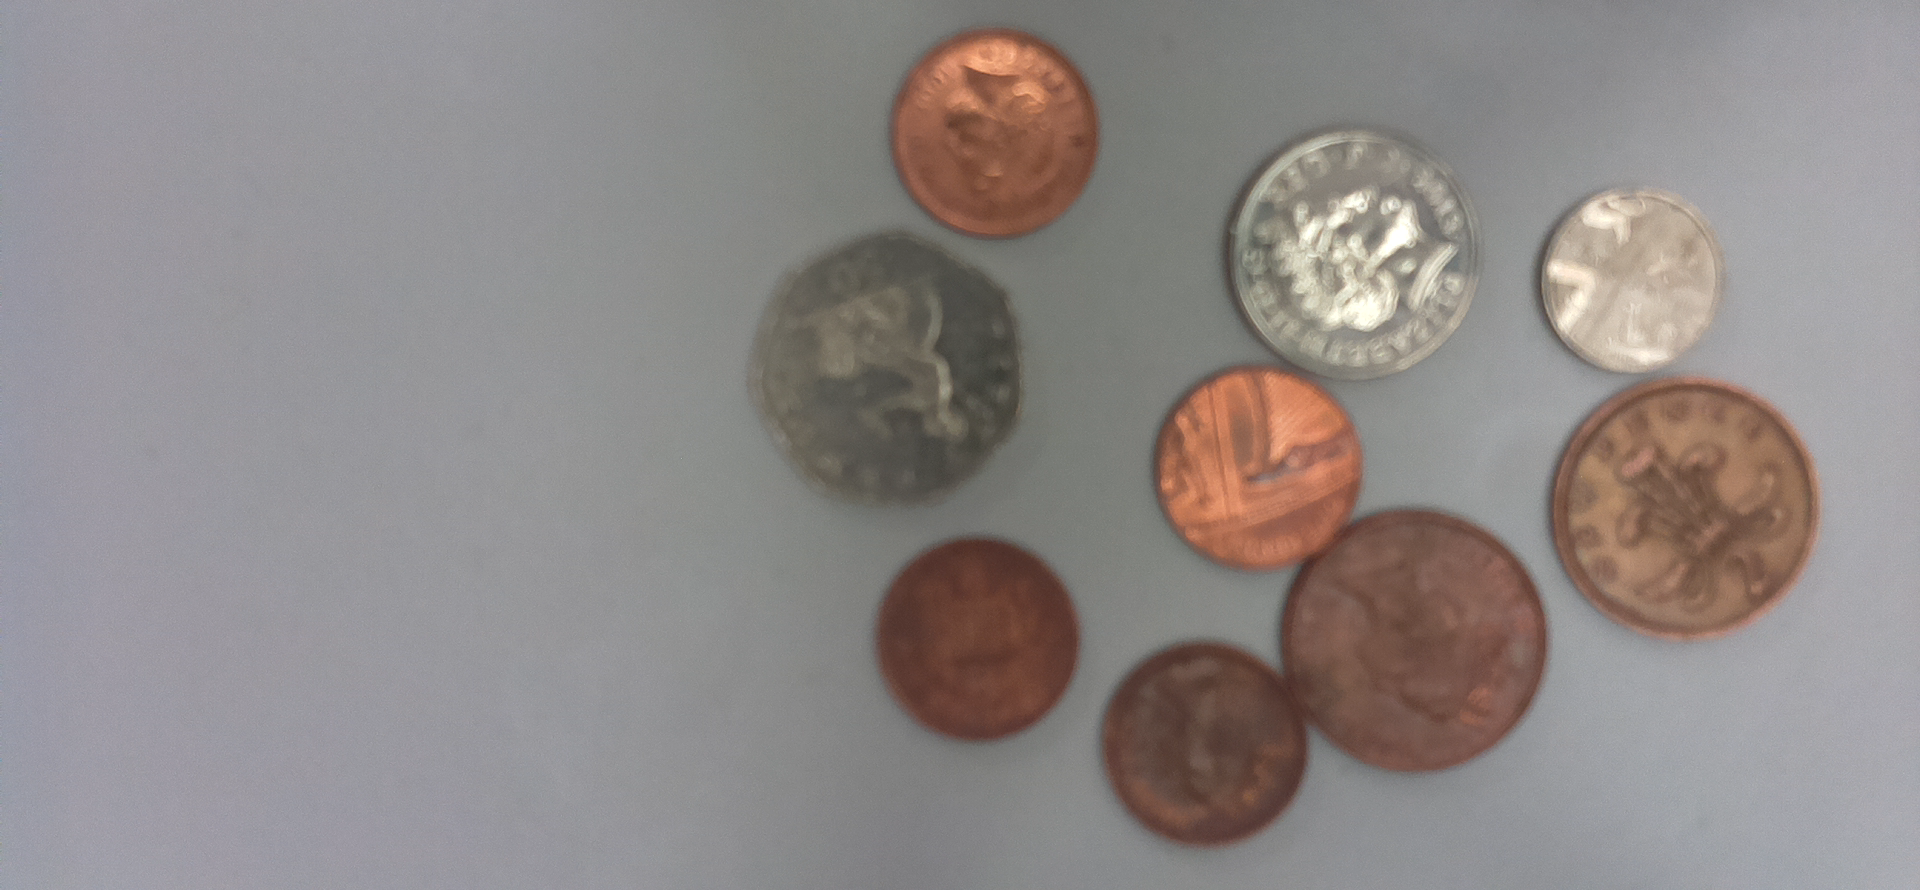

In [128]:
cv2_imshow(image)

In [56]:
def hough_circle_detection(image):
  # turning original image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # blur grayscale image to reduce noise and help the circle detection
  gray_blurred = cv2.medianBlur(gray, 5)

  circles = cv2.HoughCircles(
    gray_blurred, #source image (blurred and grayscaled)
    cv2.HOUGH_GRADIENT, #type of detection
    dp=1, #
    minDist=200, # min distance between the centers of circles
    param1 =50,
    param2 =40,
    minRadius=40,
    maxRadius =160,)
  return circles

In [137]:
circles = hough_circle_detection(image)
if circles is not None:
  circles = np.uint16(np.around(circles))
  #count=1
  for i in circles[0, :]:
    #Draw outer circle
    cv2.circle(image, (i[0], i[1]), i[2], (0,255,0),2)
    #draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0,0,255),3)
    ## giving numbers for reference
    #cv2.putText(image, str(count), (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0),2)
    #count +=1

In [131]:
#radius of the circles:
radii =get_radius(circles)
radii

[134, 132, 102, 120, 88, 102, 107, 96]

In [132]:
# call for brigthness function
bright_values =av_pix(image, circles, 20)
print(bright_values)

[82.98458333333333, 88.77104166666666, 71.62083333333334, 174.39708333333334, 171.315, 71.17604166666666, 94.88, 116.085]


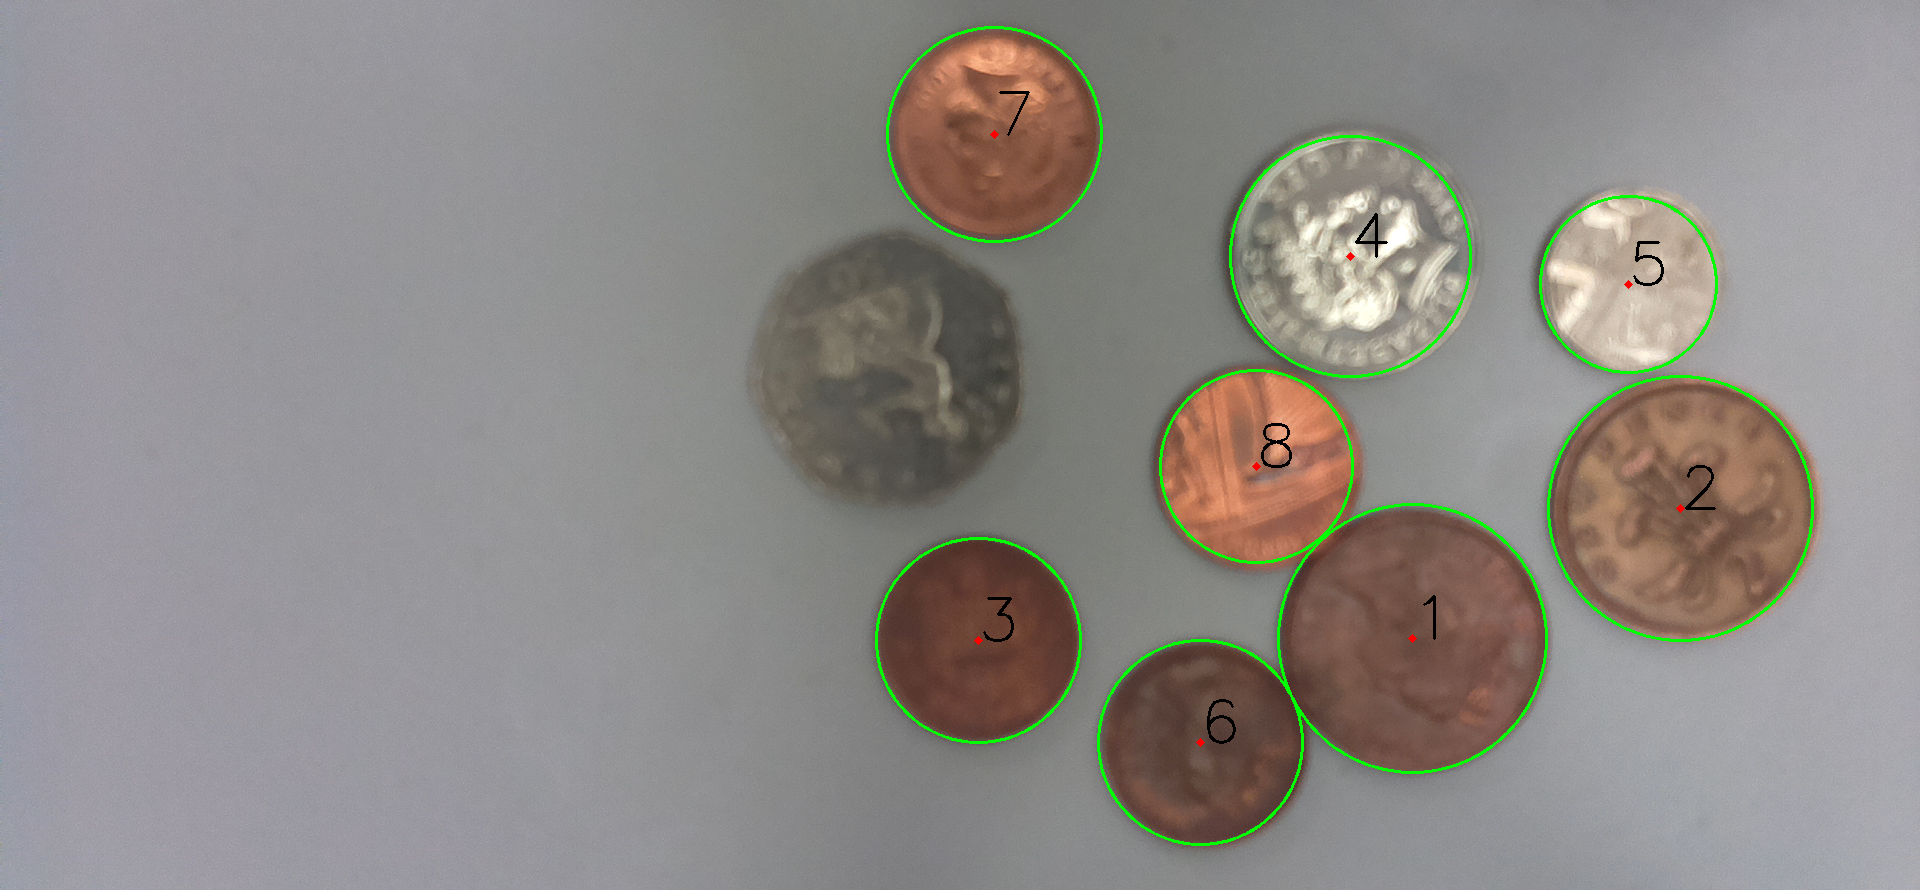

In [133]:
## below will show images of coins with their determined circles and reference numbers given . coin which is not circle is not covered in this project
cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [138]:
## show coin values onto coins.

values =[]
for a,b, in zip(bright_values, radii):
  if a>150 and b>100:
    values.append(10)
  elif a>150 and b<=110:
    values.append(5)
  elif a<150 and b>110:
    values.append(2)
  elif a<150 and b<110:
    values.append(1)
print(values)
count_2=0
for i in circles[0, :]:

  cv2.putText(image, str(values[count_2]) +'p', (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0),2)
  count_2 +=1
cv2.putText(image, 'Estimated Total Value: ' + str(sum(values)) +'p', (200,100), cv2.FONT_HERSHEY_SIMPLEX, 1.3, 255)

[2, 2, 1, 10, 5, 1, 1, 1]


array([[[160, 149, 148],
        [164, 153, 151],
        [157, 146, 145],
        ...,
        [159, 153, 156],
        [157, 152, 155],
        [155, 150, 153]],

       [[153, 142, 141],
        [157, 146, 145],
        [166, 155, 154],
        ...,
        [159, 153, 156],
        [157, 152, 155],
        [155, 150, 153]],

       [[168, 158, 154],
        [166, 156, 152],
        [164, 153, 151],
        ...,
        [160, 155, 156],
        [159, 154, 154],
        [152, 147, 147]],

       ...,

       [[158, 149, 139],
        [165, 156, 145],
        [170, 160, 154],
        ...,
        [172, 166, 164],
        [174, 167, 167],
        [176, 169, 170]],

       [[174, 164, 160],
        [168, 158, 154],
        [172, 159, 156],
        ...,
        [171, 167, 167],
        [173, 168, 168],
        [177, 173, 173]],

       [[174, 164, 160],
        [172, 161, 158],
        [169, 157, 153],
        ...,
        [173, 168, 168],
        [177, 173, 173],
        [171, 167, 167]]

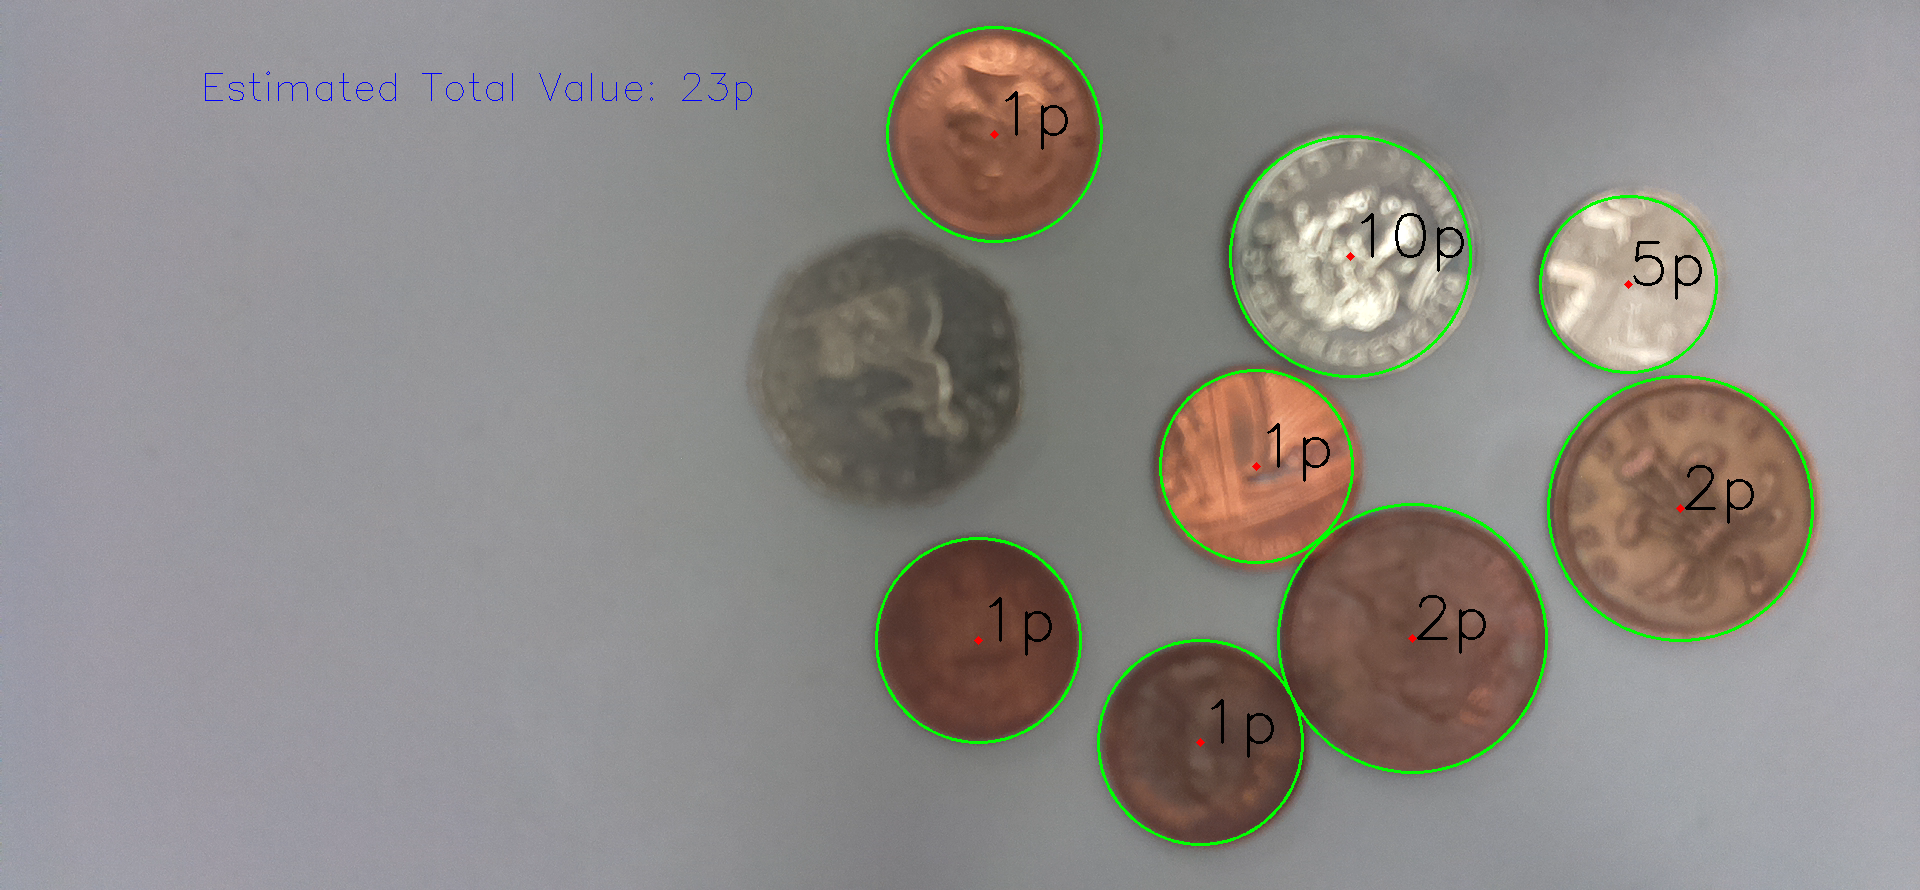

In [139]:
cv2_imshow(image)